# MNIST Noise Sensitivity
Load aggregated results and visualize test accuracy vs sigma for each activation.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
summary_path = 'results/results_summary.csv'
df = pd.read_csv(summary_path)
x_col = 'p'
if 'corruption_mode' in df.columns and df['corruption_mode'].nunique() == 1:
    if df['corruption_mode'].iloc[0] == 'additive':
        x_col = 'sigma'
df

,activation,model_type,p,repeats,mean_test_accuracy,std_test_accuracy,stderr_test_accuracy
0,relu,mlp,0.0,100,0.979771,0.001670,0.000167
1,relu,mlp,0.1,100,0.982977,0.001291,0.000129
2,relu,mlp,0.2,100,0.981465,0.001371,0.000137
3,relu,mlp,0.3,100,0.979221,0.001478,0.000148
4,relu,mlp,0.4,100,0.975769,0.001623,0.000162
5,relu,mlp,0.5,100,0.972252,0.001774,0.000177
6,relu,mlp,0.6,100,0.964397,0.001882,0.000188
7,relu,mlp,0.7,100,0.945968,0.002921,0.000292
8,relu,mlp,0.8,100,0.895423,0.007949,0.000795
9,relu,mlp,0.9,100,0.770988,0.019326,0.001933


In [ ]:
model_types = sorted(df['model_type'].unique())
for model_type in model_types:
    sub = df[df['model_type'] == model_type]
    activations = sorted(sub['activation'].unique())
    n = len(activations)
    fig, axes = plt.subplots(1, n, figsize=(4 * n, 3), sharey=True)
    if n == 1:
        axes = [axes]
    for ax, act in zip(axes, activations):
        d = sub[sub['activation'] == act].sort_values(x_col)
        ax.errorbar(d[x_col], d['mean_test_accuracy'], yerr=d['stderr_test_accuracy'], marker='o')
        ax.set_title(f'{model_type} / {act}')
        ax.set_xlabel(x_col)
        ax.grid(True, alpha=0.3)
    axes[0].set_ylabel('mean test accuracy')
    plt.tight_layout()
    plt.show()

In [ ]:
# Explicit 3-subplot snippet (one per activation) for a chosen model type.
model_type = df['model_type'].unique()[0]
sub = df[df['model_type'] == model_type]
activations = sorted(sub['activation'].unique())[:3]

fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for ax, act in zip(axes, activations):
    d = sub[sub['activation'] == act].sort_values(x_col)
    ax.errorbar(d[x_col], d['mean_test_accuracy'], yerr=d['stderr_test_accuracy'], marker='o')
    ax.set_title(f'{model_type} / {act}')
    ax.set_xlabel(x_col)
    ax.grid(True, alpha=0.3)
axes[0].set_ylabel('mean test accuracy')
plt.tight_layout()
plt.show()

In [ ]:
# Std-dev vs p for each activation (one subplot per activation).
model_type = df['model_type'].unique()[0]
sub = df[df['model_type'] == model_type]
activations = sorted(sub['activation'].unique())
n = len(activations)
fig, axes = plt.subplots(1, n, figsize=(4 * n, 3), sharey=True)
if n == 1:
    axes = [axes]
for ax, act in zip(axes, activations):
    d = sub[sub['activation'] == act].sort_values(x_col)
    ax.plot(d[x_col], d['std_test_accuracy'], marker='o')
    ax.set_title(f'{model_type} / {act}')
    ax.set_xlabel(x_col)
    ax.grid(True, alpha=0.3)
axes[0].set_ylabel('std test accuracy')
plt.tight_layout()
plt.show()

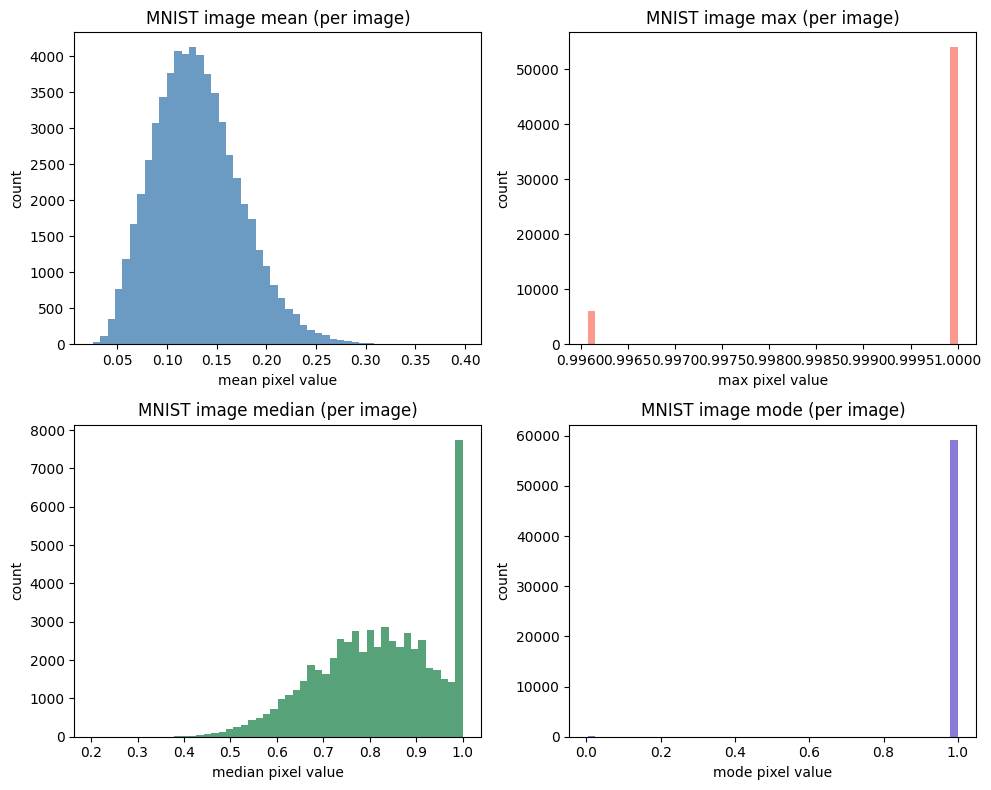

In [20]:
import torch
from torchvision import datasets, transforms

mnist = datasets.MNIST(root='data', train=True, download=True, transform=transforms.ToTensor())
means = []
maxes = []
medians = []
modes = []
for x, _ in mnist:
    flat = x.flatten()
    means.append(flat.mean().item())
    maxes.append(flat.max().item())
    nonzero = flat[flat > 0]
    if nonzero.numel() == 0:
        medians.append(0.0)
        modes.append(0.0)
    else:
        medians.append(nonzero.median().item())
        modes.append(torch.mode(nonzero).values.item())

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.hist(means, bins=50, color='steelblue', alpha=0.8)
plt.title('MNIST image mean (per image)')
plt.xlabel('mean pixel value')
plt.ylabel('count')

plt.subplot(2, 2, 2)
plt.hist(maxes, bins=50, color='salmon', alpha=0.8)
plt.title('MNIST image max (per image)')
plt.xlabel('max pixel value')
plt.ylabel('count')

plt.subplot(2, 2, 3)
plt.hist(medians, bins=50, color='seagreen', alpha=0.8)
plt.title('MNIST image median (per image)')
plt.xlabel('median pixel value')
plt.ylabel('count')

plt.subplot(2, 2, 4)
plt.hist(modes, bins=50, color='slateblue', alpha=0.8)
plt.title('MNIST image mode (per image)')
plt.xlabel('mode pixel value')
plt.ylabel('count')
plt.tight_layout()
plt.show()

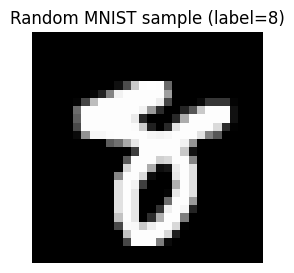

In [4]:
import random

mnist = datasets.MNIST(root='data', train=True, download=True, transform=transforms.ToTensor())
idx = random.randrange(len(mnist))
img, label = mnist[idx]
plt.figure(figsize=(3, 3))
plt.imshow(img.squeeze(0), cmap='gray')
plt.title(f'Random MNIST sample (label={label})')
plt.axis('off')
plt.show()

In [5]:
from matplotlib import animation
from IPython.display import HTML

# Pick a single MNIST "4" and animate corruption with p in [0, 1].
mnist = datasets.MNIST(root='data', train=True, download=True, transform=transforms.ToTensor())
idx = next(i for i, (_, y) in enumerate(mnist) if y == 8)
img, label = mnist[idx]

# New global seed per trajectory.
seed = random.randrange(1, 1_000_000_000)
random.seed(seed)
torch.manual_seed(seed)
print(f'Animation seed: {seed}')

ps = torch.linspace(0.0, 1.0, 100)
frames = []
for p in ps:
    mask = torch.rand_like(img) < p
    replacement = torch.rand_like(img)
    corrupted = torch.where(mask, replacement, img)
    frames.append(corrupted.squeeze(0).numpy())

fig, ax = plt.subplots(figsize=(3, 3))
im = ax.imshow(frames[0], cmap='gray', vmin=0, vmax=1)
title = ax.set_title(f'label={label}, p={ps[0].item():.2f}')
ax.axis('off')

def update(frame_idx: int):
    im.set_data(frames[frame_idx])
    title.set_text(f'label={label}, p={ps[frame_idx].item():.2f}')
    return im, title

anim = animation.FuncAnimation(
    fig,
    update,
    frames=len(frames),
    interval=50,
    blit=False,
)
plt.close(fig)
HTML(anim.to_jshtml())

Animation seed: 517621507


In [10]:
from matplotlib import animation
from IPython.display import HTML

# Average over multiple trajectories (each with its own global seed).
mnist = datasets.MNIST(root='data', train=True, download=True, transform=transforms.ToTensor())
idx = next(i for i, (_, y) in enumerate(mnist) if y == 4)
img, label = mnist[idx]

num_trajectories = 1000
ps = torch.linspace(0.0, 1.0, 100)
sum_frames = torch.zeros((len(ps), 1, 28, 28))
seeds = [random.randrange(1, 1_000_000_000) for _ in range(num_trajectories)]

with torch.no_grad():
    for seed in seeds:
        torch.manual_seed(seed)
        for i, p in enumerate(ps):
            mask = torch.rand_like(img) < p
            replacement = torch.rand_like(img)
            corrupted = torch.where(mask, replacement, img)
            sum_frames[i] += corrupted

avg_frames = (sum_frames / num_trajectories).squeeze(1).numpy()

fig, ax = plt.subplots(figsize=(3, 3))
im = ax.imshow(avg_frames[0], cmap='gray', vmin=0, vmax=1)
title = ax.set_title(f'label={label}, p={ps[0].item():.2f} (avg)')
ax.axis('off')

def update(frame_idx: int):
    im.set_data(avg_frames[frame_idx])
    title.set_text(f'label={label}, p={ps[frame_idx].item():.2f} (avg)')
    return im, title

anim = animation.FuncAnimation(
    fig,
    update,
    frames=len(avg_frames),
    interval=50,
    blit=False,
)
plt.close(fig)
HTML(anim.to_jshtml())

In [ ]:
from matplotlib import animation
from IPython.display import HTML

# Additive noise animation: iid Uniform(-sigma/2, sigma/2) with clipping.
mnist = datasets.MNIST(root='data', train=True, download=True, transform=transforms.ToTensor())
idx = next(i for i, (_, y) in enumerate(mnist) if y == 8)
img, label = mnist[idx]

sigmas = torch.linspace(0.0, 1.0, 100)
frames = []
for sigma in sigmas:
    noise = (torch.rand_like(img) - 0.5) * sigma
    corrupted = torch.clamp(img + noise, 0.0, 1.0)
    frames.append(corrupted.squeeze(0).numpy())

fig, ax = plt.subplots(figsize=(3, 3))
im = ax.imshow(frames[0], cmap='gray', vmin=0, vmax=1)
title = ax.set_title(f'label={label}, sigma={sigmas[0].item():.2f}')
ax.axis('off')

def update(frame_idx: int):
    im.set_data(frames[frame_idx])
    title.set_text(f'label={label}, sigma={sigmas[frame_idx].item():.2f}')
    return im, title

anim = animation.FuncAnimation(
    fig,
    update,
    frames=len(frames),
    interval=50,
    blit=False,
)
plt.close(fig)
anim.save('mnist_additive_noise.gif', writer='pillow', fps=20)
HTML(anim.to_jshtml())

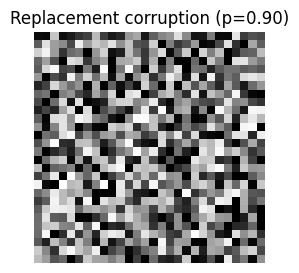

Label: 0


,trial,guess,true,success,p
4,5,8,1,0,0.7
5,6,9,1,0,0.7
6,7,3,0,0,0.7
7,8,8,6,0,0.9
8,9,6,0,0,0.9


In [28]:
# Replacement corruption quiz: set p, guess the digit, then log results.
import random
import os
import pandas as pd

p = 0.9  # set corruption probability here
num_trials = 3  # number of quiz rounds to run
log_path = 'results/guess_log.csv'
os.makedirs('results', exist_ok=True)

if os.path.exists(log_path):
    df = pd.read_csv(log_path)
    trial = int(df['trial'].max()) + 1 if not df.empty else 1
else:
    df = pd.DataFrame(columns=['trial', 'p', 'guess', 'true', 'success'])
    trial = 1

mnist = datasets.MNIST(root='data', train=True, download=True, transform=transforms.ToTensor())

for _ in range(num_trials):
    idx = random.randrange(len(mnist))
    img, label = mnist[idx]
    mask = torch.rand_like(img) < p
    replacement = torch.rand_like(img)
    corrupted = torch.where(mask, replacement, img)

    plt.figure(figsize=(3, 3))
    plt.imshow(corrupted.squeeze(0), cmap='gray', vmin=0, vmax=1)
    plt.title(f'Replacement corruption (p={p:.2f})')
    plt.axis('off')
    plt.show()

    guess = input('Your guess (0-9): ')
    try:
        guess_val = int(guess)
    except ValueError:
        guess_val = -1

    success = 1 if guess_val == int(label) else 0
    new_row = {
        'trial': trial,
        'p': p,
        'guess': guess_val,
        'true': int(label),
        'success': success,
    }
    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
    df.to_csv(log_path, index=False)

    print(f'Label: {label}')
    trial += 1

df.tail()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Finite-size scaling from per-run width sweep data.
per_run_path = 'results/results_per_run_width_sweep_21_steps_high_p.csv'
df = pd.read_csv(per_run_path)

# Collapse MLP data only (width encoded in mlp_hidden_sizes).
df = df[df['model_type'] == 'mlp'].copy()
df['mlp_width'] = df['mlp_hidden_sizes'].apply(lambda x: int(str(x).strip('[]').split(',')[0]))

# Aggregate mean accuracy by width, activation, and p.
grouped = df.groupby(['activation', 'mlp_width', 'p'], as_index=False)['test_accuracy']
agg = grouped.mean().rename(columns={'test_accuracy': 'mean_test_accuracy'})

# Define p* as the p where accuracy falls to half of (A0 - Achance).
chance = 0.1
pstars = {}
widths = sorted(agg['mlp_width'].unique())
activations = sorted(agg['activation'].unique())

for act in activations:
    pstars[act] = {}
    for w in widths:
        sub = agg[(agg['activation'] == act) & (agg['mlp_width'] == w)].sort_values('p')
        a0 = sub[sub['p'] == sub['p'].min()]['mean_test_accuracy'].iloc[0]
        target = chance + 0.5 * (a0 - chance)
        idx = (sub['mean_test_accuracy'] - target).abs().idxmin()
        pstars[act][w] = sub.loc[idx, 'p']

# Choose a scaling exponent alpha by a simple heuristic.
alpha = 0.5

for act in activations:
    fig, ax = plt.subplots(figsize=(4, 3))
    for w in widths:
        sub = agg[(agg['activation'] == act) & (agg['mlp_width'] == w)].sort_values('p')
        p_star = pstars[act][w]
        x = (sub['p'] - p_star) * (w ** alpha)
        y = sub['mean_test_accuracy']
        ax.plot(x, y, marker='o', label=f'w={w}')
    ax.set_title(f'Collapse: {act} (alpha={alpha})')
    ax.set_xlabel('(p - p*) * w^alpha')
    ax.set_ylabel('mean test accuracy')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8)
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Fit sigmoid to accuracy vs p and estimate p* and slope.
per_run_path = 'results/results_per_run_width_sweep_21_steps_high_p.csv'
df = pd.read_csv(per_run_path)
df = df[df['model_type'] == 'mlp'].copy()
df['mlp_width'] = df['mlp_hidden_sizes'].apply(lambda x: int(str(x).strip('[]').split(',')[0]))

grouped = df.groupby(['activation', 'mlp_width', 'p'], as_index=False)['test_accuracy']
agg = grouped.mean().rename(columns={'test_accuracy': 'mean_test_accuracy'})

chance = 0.1
activations = sorted(agg['activation'].unique())
widths = sorted(agg['mlp_width'].unique())

fit_results = {}
for act in activations:
    fit_results[act] = {}
    for w in widths:
        sub = agg[(agg['activation'] == act) & (agg['mlp_width'] == w)].sort_values('p')
        p_vals = sub['p'].values.reshape(-1, 1)
        a_vals = sub['mean_test_accuracy'].values
        # Normalize accuracy into (0,1) for logistic fit.
        a0 = a_vals[0]
        y = (a_vals - chance) / max(1e-6, (a0 - chance))
        y = np.clip(y, 1e-4, 1 - 1e-4)
        logit_y = np.log(y / (1 - y))

        # Fit logit_y ~ beta0 + beta1 * p
        X = np.hstack([np.ones_like(p_vals), p_vals])
        beta, _, _, _ = np.linalg.lstsq(X, logit_y, rcond=None)
        beta0, beta1 = beta
        p_star = -beta0 / beta1
        slope = abs(beta1)

        fit_results[act][w] = {
            'p_star': float(p_star),
            'slope': float(slope),
            'a0': float(a0),
        }

# Plot p* and slope vs width.
for act in activations:
    pstars = [fit_results[act][w]['p_star'] for w in widths]
    slopes = [fit_results[act][w]['slope'] for w in widths]

    fig, ax = plt.subplots(1, 2, figsize=(8, 3))
    ax[0].plot(widths, pstars, marker='o')
    ax[0].set_title(f'p* vs width ({act})')
    ax[0].set_xlabel('width')
    ax[0].set_ylabel('p*')
    ax[0].grid(True, alpha=0.3)

    ax[1].plot(widths, slopes, marker='o')
    ax[1].set_title(f'slope vs width ({act})')
    ax[1].set_xlabel('width')
    ax[1].set_ylabel('sigmoid slope')
    ax[1].grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Alpha scan for best collapse (minimize variance near knee).
alphas = np.linspace(0.0, 1.0, 21)
alpha_best = {}

for act in activations:
    scores = []
    for alpha in alphas:
        xs = []
        ys = []
        for w in widths:
            sub = agg[(agg['activation'] == act) & (agg['mlp_width'] == w)].sort_values('p')
            p_star = fit_results[act][w]['p_star']
            x = (sub['p'].values - p_star) * (w ** alpha)
            y = sub['mean_test_accuracy'].values
            xs.append(x)
            ys.append(y)
        # Align by interpolating onto a common grid.
        x_min = max([x.min() for x in xs])
        x_max = min([x.max() for x in xs])
        grid = np.linspace(x_min, x_max, 50)
        interp = [np.interp(grid, xs[i], ys[i]) for i in range(len(xs))]
        stack = np.vstack(interp)
        scores.append(np.mean(np.var(stack, axis=0)))
    alpha_best[act] = alphas[int(np.argmin(scores))]

# Plot best collapse per activation.
for act in activations:
    alpha = alpha_best[act]
    fig, ax = plt.subplots(figsize=(4, 3))
    for w in widths:
        sub = agg[(agg['activation'] == act) & (agg['mlp_width'] == w)].sort_values('p')
        p_star = fit_results[act][w]['p_star']
        x = (sub['p'].values - p_star) * (w ** alpha)
        y = sub['mean_test_accuracy'].values
        ax.plot(x, y, marker='o', label=f'w={w}')
    ax.set_title(f'Best collapse: {act} (alpha={alpha:.2f})')
    ax.set_xlabel('(p - p*) * w^alpha')
    ax.set_ylabel('mean test accuracy')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8)
    plt.tight_layout()
    plt.show()
